 # Opis notatnika
 Po pobraniu danych z zewnętrznego serwisu, a następnie załadowaniu ich do wewnętrznej bazy, czas na ich analizę oraz eksplorację.

 Eksplorację zaczniemy od centralnej bazy danych `flight`, w której nastawimy się w szczególności na zmienną `dep_delay`, która informuje o wysokości opóźnienia odlotu samolotu.

 Dzięki wyciągnięciu wniosków z danych, które otrzymaliśmy, będziemy mogli zaproponować system raportowania wspomagający biznes, czy zdefiniować dalsze kroki, które usprawnią działania lotnisk.

 Tutaj zaimportuj wymagane biblioteki

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import matplotlib.pyplot as plt

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [2]:
username = 'postgres'
password='al2cx7hsixj',  # Przypadkowe, nieprawdziwe hasło
host = 'localhost'
database = 'airlines'
port = 5432

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [3]:
url = URL.create(
    "postgresql",
    username="postgres",
    password='al2cx7hsixj',  # Przypadkowe, nieprawdziwe hasło 
    host="localhost",
    database="airlines",
)
engine = create_engine(url)

In [4]:
# Sprawdzenie widoku po wywołaniu metody read_sql_table z wykorzystaniem utworzonego engine:

pd.read_sql_table('flight', con=engine,)

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386115,1386116,3,26,4,DL,N350DN,1982,13303,12953,1956,...,183.0,169.0,1096.0,5,NaN,NaN,NaN,NaN,NaN,2020
1386116,1386117,3,26,4,DL,N908DE,1987,13303,10397,1120,...,121.0,109.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020
1386117,1386118,3,26,4,DL,None,1998,13303,10397,1817,...,125.0,NaN,594.0,3,NaN,NaN,NaN,NaN,NaN,2020
1386118,1386119,3,26,4,DL,N352NW,2025,13303,10397,1937,...,123.0,107.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020


 # Wczytanie danych do obszaru roboczego
 Wczytaj do obszaru roboczego zawartośc tabeli `flight` i zapisz w ramce o nazwie `flight_df_raw`.

 Polecenia do wykonania:  
 1. Usuń z ramki loty, które:
     * odbyły się w 2020 roku,
     * zostały anulowane.  
 2. Zmień nazwę kolumny `dep_delay_new` na `dep_delay`.  
 3. Tak powstałą tabelę zapisz do ramki, która nazywać się będzie `flight_df` - z tej ramki będziemy korzystali do końca analizy.  
 4. Wyznacz, ile kolumn ma tabela `flight_df`, wynik zapisz do zmiennej `flight_df_columns_amount`.  
 5. Wyznacz, ile wierszy ma tabela `flight_df`, wynik zapisz do zmiennej `flight_df_rows_amount`.

 Wczytanie ramki danych do obszaru roboczego

In [5]:
flight_df_raw = pd.read_sql_table('flight', con=engine)

 Czyszczenie danych poprzez usunięcie lotów z roku 2020 oraz tych anulowane

In [6]:
# Usunięcie lotów z 2020:

flight_df = flight_df_raw.loc[flight_df_raw['year'] != 2020]


# Sprawdzenie, czy loty z 2020 zostały usunięte:

flight_df['year'].unique()

array([2019], dtype=int64)

In [7]:
# Usunięcie lotów anulowanych:

flight_df = flight_df.loc[flight_df_raw['cancelled'] == 0]


# Sprawdzenie, czy loty anulowane zostały usunięte:

flight_df['cancelled'].unique()

array([0.])

 Zmiana nazwy kolumny `dep_delay_new` na `dep_delay`

In [8]:
flight_df = flight_df.rename(columns={'dep_delay_new': 'dep_delay'}, inplace=False)

 # Analiza kolumny `dep_delay` cz. 1
 Wyznaczenie statystyk opisowych dla zmiennej `dep_delay` i zapisanie do zmiennej `dep_delay_statistics_df`.
 W ramce mają znaleźć się następujące wiersze:
 - średnia,
 - mediana,
 - odchylenie standardowe,
 - min, max
 - percentyle `[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]`

Wyniki zostaną zaokrąglone do dwóch miejsc po przecinku.

In [15]:
# Szukane percentyle

per = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

dep_delay_statistics_df = flight_df['dep_delay'].describe(percentiles=per).round(2)

In [16]:
# Otrzymane percentyle:

dep_delay_statistics_df

count    1095742.00
mean          14.77
std           46.49
min            0.00
10%            0.00
25%            0.00
50%            0.00
75%            8.00
90%           42.00
95%           81.00
99%          206.00
max         1959.00
Name: dep_delay, dtype: float64

 # Analiza kolumny `dep_delay` cz. 2
 Analiza kolumny `dep_delay` poprzez polecenia:  
 1. Wyznaczenie wykresu dla _całej kolumny_.  
 2. Wyznaczenie wykresu z pominięciem tych wierszy, dla których `dep_delay=0`.  
 3. Obcięcie wykresu do percentyla 95% oraz pomijającego `dep_delay=0`.  

In [18]:
flight_df['dep_delay'].max()  # Zapytanie do znalezienia maksymalnej wartości na osi x wykresu

1959.0

 Wykres dla całej kolumny `dep_delay`

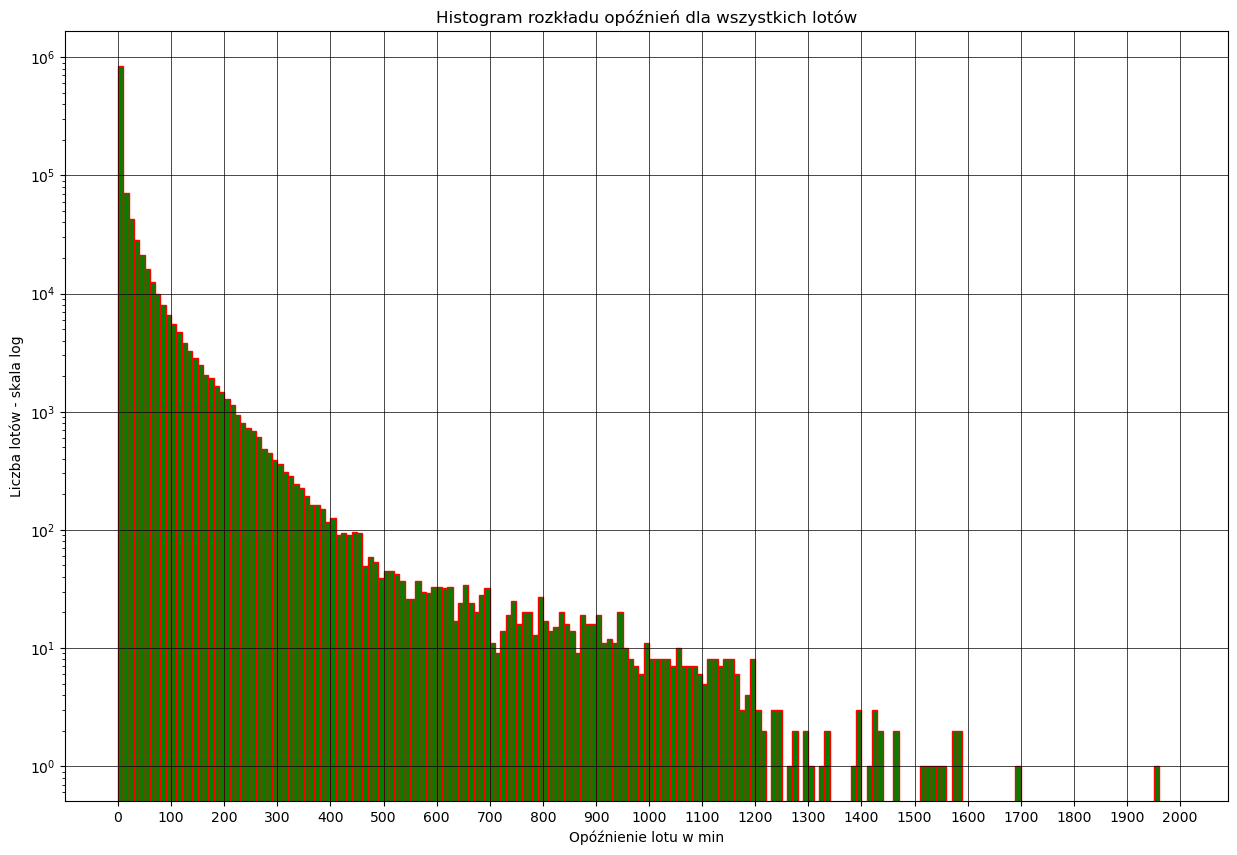

In [19]:
plt.figure(figsize=(15,10))
 
x = plt.hist(flight_df['dep_delay'],bins=range(0, 2000,10), color="Green", edgecolor="Red", log=True)
plt.ylabel('Liczba lotów - skala log')
plt.xlabel('Opóźnienie lotu w min')
plt.xticks(ticks=range(0, 2001, 100))
plt.title('Histogram rozkładu opóźnień dla wszystkich lotów')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

 Wykres dla `dep_delay` z warunkiem `dep_delay > 0`

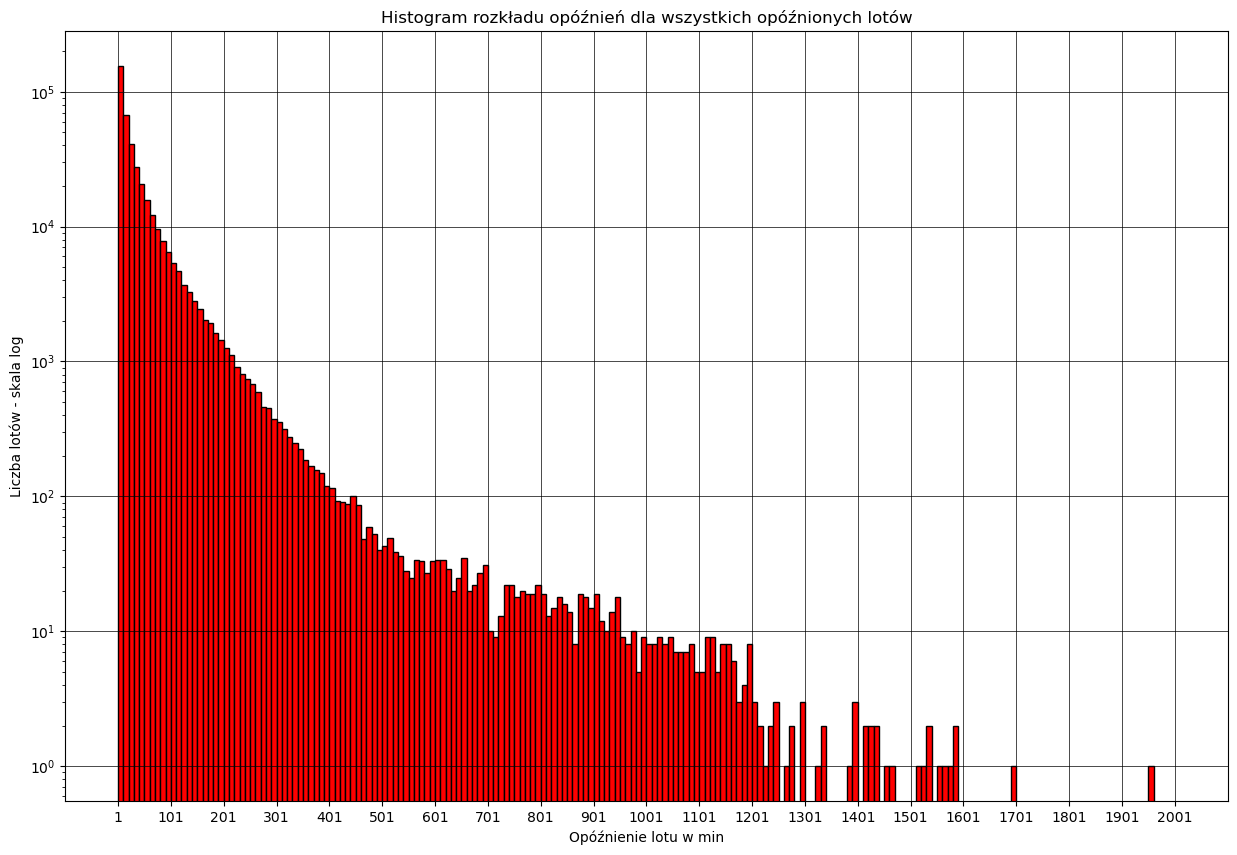

In [65]:
plt.figure(figsize=(15,10))

# Wybranie danych, gdzie dep_delay > 0


df = flight_df.loc[flight_df['dep_delay'] > 0, 'dep_delay']

x = plt.hist(df,bins=range(1, 2002,10), color="Red", edgecolor="Black", log=True)
plt.ylabel('Liczba lotów - skala log')
plt.xlabel('Opóźnienie lotu w min')
plt.xticks(ticks=range(1, 2002, 100)) 

plt.title('Histogram rozkładu opóźnień dla wszystkich opóźnionych lotów')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')

plt.show()

 Wykres dla `dep_delay` z warunkami `dep_delay > 0` oraz `dep_delay < percentile 95%`

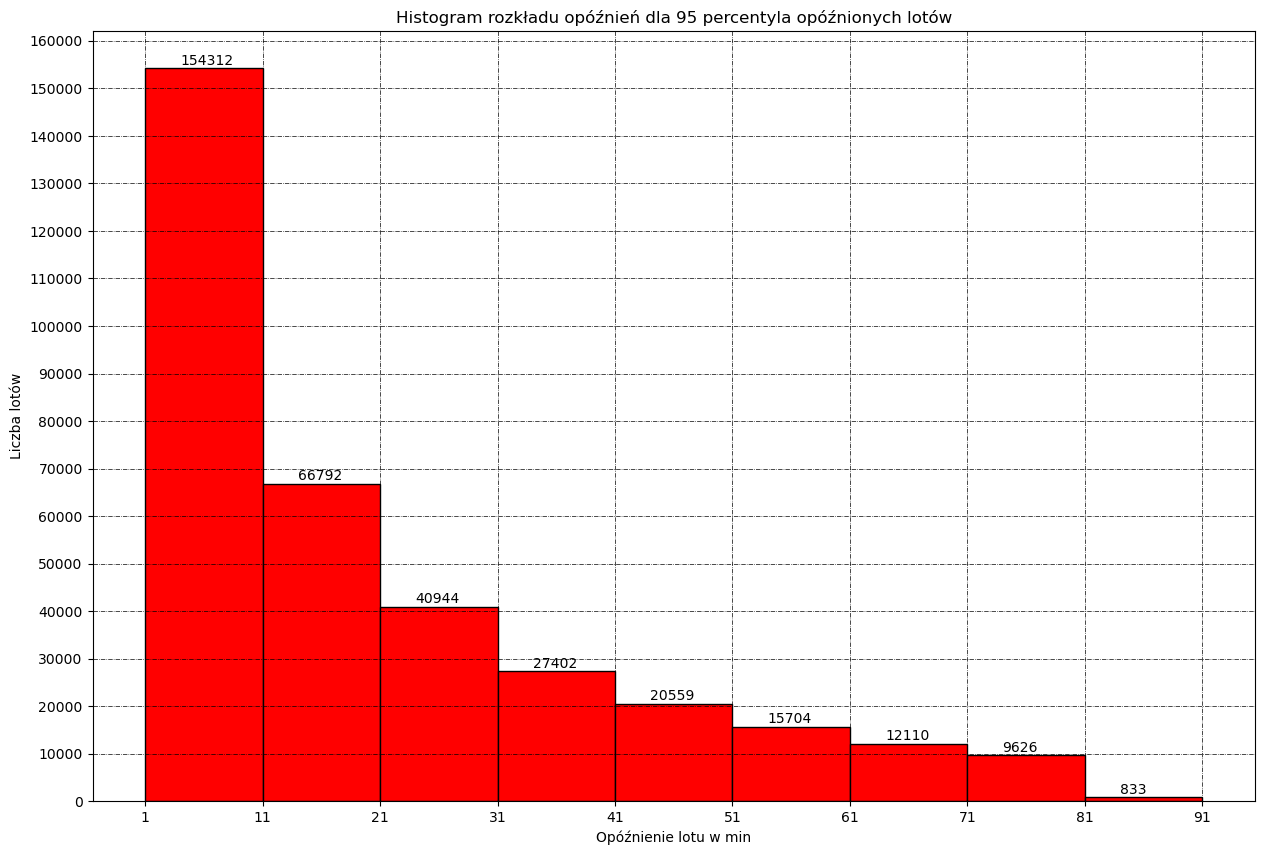

In [20]:
plt.figure(figsize=(15,10))

# Wybranie danych, gdzie dep_delay > 0 oraz dep_delay < percentile 95%

df = flight_df.loc[(flight_df['dep_delay'] > 0) & (flight_df['dep_delay'] <= 81) , 'dep_delay']


x = plt.hist(df,bins=range(1, 101,10), color="Red", edgecolor="Black", log=False)
plt.ylabel('Liczba lotów')
plt.xlabel('Opóźnienie lotu w min')
plt.xticks(ticks=range(1, 101, 10)) 
plt.yticks(ticks=range(0, 160001, 10000))

plt.title('Histogram rozkładu opóźnień dla 95 percentyla opóźnionych lotów')
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='black')


# Iteracja poprzez dane i dodanie etykiet

data = df.tolist()
labels = []
for i in range(1,82,10):
    count_elements = len([x for x in data if i <= x < i + 10])
    plt.text(i + 3, count_elements + 100, str(count_elements), rotation=0, va='bottom', ha='left')


plt.show()


 # Analiza opóźnień

 Wyznaczenie jaki procent wszystkich lotów był opóźniony:
 
 Nowa kolumna - `is_delayed` jako te opóźnienia, które wynosiły więcej niż `(>)` 15 minut.
  
 Wynik zostanie zapisany do zmiennej `delayed_ratio` z dokładnością do dwóch miejsc po przecinku.

In [21]:
# Dodanie kolumny opóźnień:

flight_df['is_delayed'] = flight_df.loc[flight_df['dep_delay'] > 15, 'dep_delay']

In [22]:
# Wyliczenie odsetka opóźnień:

delayed_ratio = (flight_df['is_delayed'].count() / len(flight_df)).round(2)

 # Opóźnienia vs. miesiąc kalendarzowy
 Zbadanie, jak zmienia się odsetek opóźnień w zależności od **miesiąca kalendarzowego**:


In [24]:
# Pogrupowanie danych wg. miesiąca:

flight_delays_by_month_df = flight_df.groupby('month').agg("count")
flight_delays_by_month_df = flight_delays_by_month_df[['id', 'is_delayed']]

# Wyliczenie odsetku opóźnień:

flight_delays_by_month_df['delays'] = (flight_delays_by_month_df['is_delayed'] / flight_delays_by_month_df['id']).round(2)

 Wykres danych z ramki `flight_delays_by_month_df`

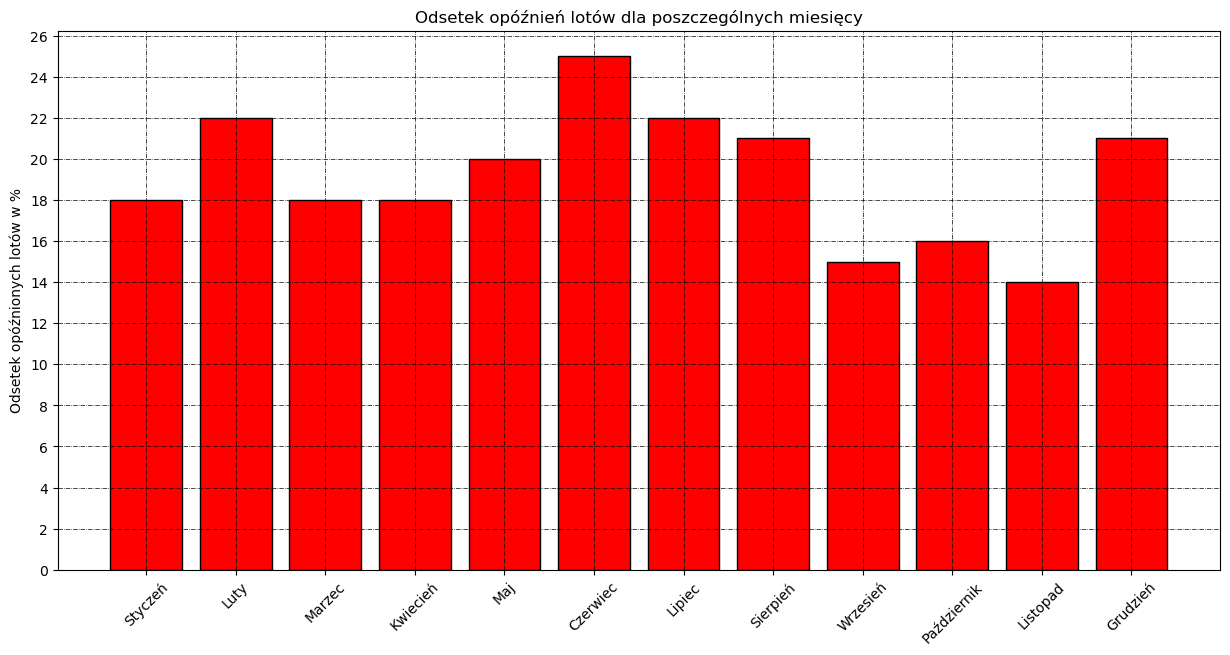

In [25]:
plt.figure(figsize=(15,7))

# Wybranie danych, gdzie dep_delay > 0 oraz dep_delay < percentile 95%

df = flight_delays_by_month_df


x = plt.bar(df.index, df['delays'] * 100, 
             color="Red", edgecolor="Black", log=False)
plt.ylabel('Odsetek opóźnionych lotów w %')

plt.yticks(ticks=range(0, 27, 2))

plt.title('Odsetek opóźnień lotów dla poszczególnych miesięcy')
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='black')

# Zapisanie nazw miesięcy na osi:

months = list(range(1, 13))
month_names = ["Styczeń", "Luty", "Marzec", "Kwiecień", "Maj", "Czerwiec", "Lipiec", "Sierpień", "Wrzesień", "Październik", "Listopad", "Grudzień"]
plt.xticks(months, month_names, rotation=45)


plt.show()

 # Opóźnienia vs. dzień tygodnia cz. 1
 Zbadanie, jak zmienia się odsetek opóźnień w zależności od **dnia tygodnia**.

In [26]:
# Pogrupowanie danych:

flight_delays_by_weekday_df = flight_df.groupby('day_of_week').agg('count')
flight_delays_by_weekday_df = flight_delays_by_weekday_df[['id', 'is_delayed']]

# Wyliczenie odsetku opóźnień:

flight_delays_by_weekday_df['delays'] = (flight_delays_by_weekday_df['is_delayed']
                                         / flight_delays_by_weekday_df['id']).round(2)

 Sporządzenie wykresu:

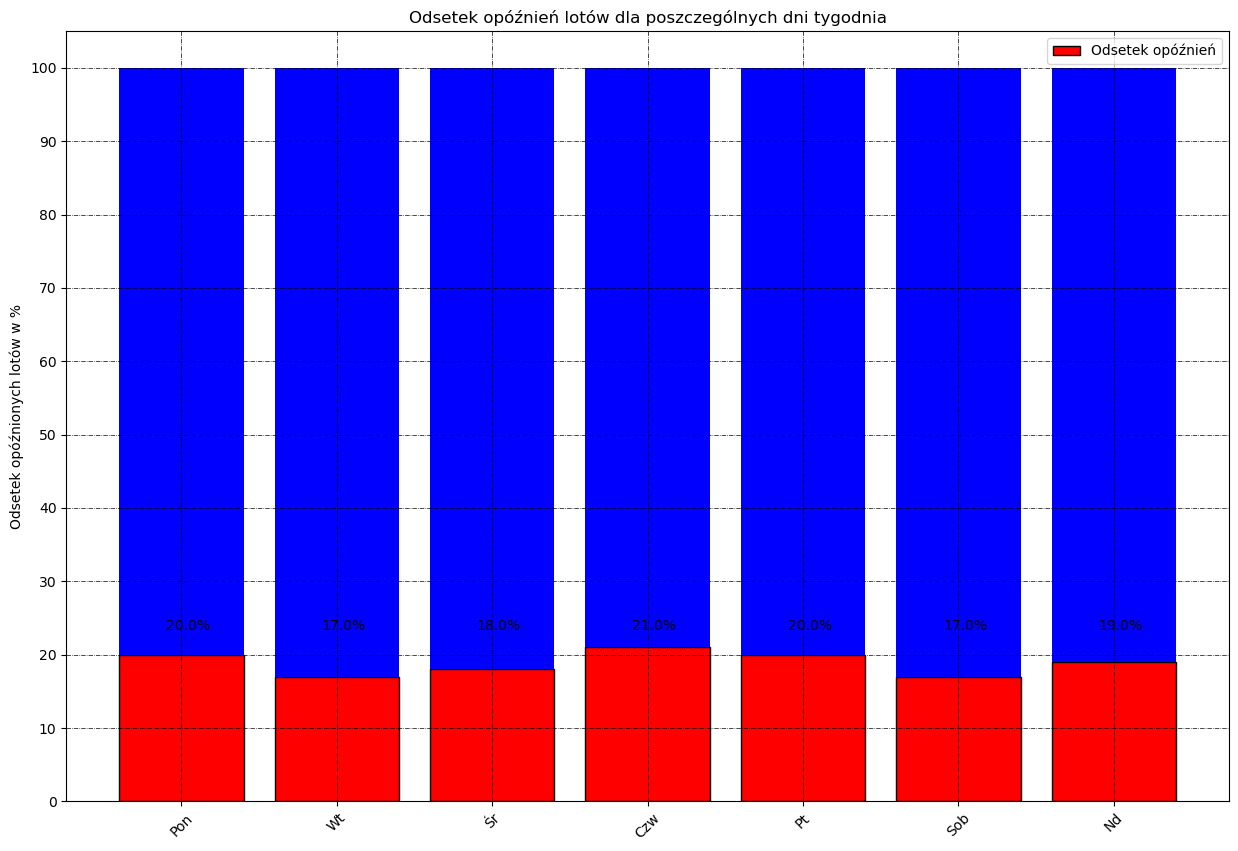

In [27]:
plt.figure(figsize=(15,10))
# Wybranie danych

df = flight_delays_by_weekday_df


x = plt.bar(df.index, df['delays'] * 100, 
             color="Red", edgecolor="Black", log=False, label="Odsetek opóźnień")

# Sporządzenie baru dopełniającego do 100%:

plt.bar(df.index, 100 - (df['delays'] * 100), color='Blue',
        bottom=(df['delays'] * 100))
plt.ylabel('Odsetek opóźnionych lotów w %')
plt.yticks(ticks=range(0, 101, 10))


plt.title('Odsetek opóźnień lotów dla poszczególnych dni tygodnia')
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='black')

# Zapisanie nazw dni tygodnia na osi:

days = list(range(1, 8))
days_names = ["Pon", "Wt", "Śr", "Czw", "Pt", "Sob", "Nd"]
plt.xticks(days, days_names, rotation=45)

plt.legend()


# Iteracja przez dane i dodanie etykiet:

# Wartości etykiet:

names = (df['delays']*100).tolist()

for i in range(1,8):
    temp_df = df.loc[df.index == i]
    name = names[i-1]
    plt.text(i-0.1, 23, str(name)+'%', rotation=0, va='bottom', ha='left')
    
plt.show()

 # Opóźnienia vs. dzień tygodnia cz. 2
 Zamiast kolumny `day_of_week` wprowadź kolumnę `is_weekend` w `flight_df`. Jako weekend - wartości 6, 7.
 1. Odsetek opóźnień w zależności od tego, czy lot odbywał się w weekend czy nie.

In [28]:
# Tworzenie nowej kolumny 'is_weekend' w zależności od wartości w kolumnie 'day_of_week':

flight_df['is_weekend'] = flight_df['day_of_week'].apply(lambda x: 1 if x > 5 else 0)

In [29]:
# Wyznaczenie odsetku opóźnień dla lotów w weekend:

flight_delays_weekend = flight_df.loc[flight_df['is_weekend'] == 1]
weekend = (flight_delays_weekend['is_delayed'].count() / len(flight_delays_weekend)).round(2)   # Zaokrąglenie wyniku do 2 miejsc po ,


# Wyznaczenie odsetku opóźnień dla lotów poza weekendami:

flight_delays_no_weekend = flight_df.loc[flight_df['is_weekend'] == 0]
no_weekend = (flight_delays_no_weekend['is_delayed'].count() / len(flight_delays_no_weekend)).round(2)


# Zebranie wyników razem:

flight_delays_by_weekend = {0: no_weekend, 1: weekend}

 Sporządzenie wykresu:

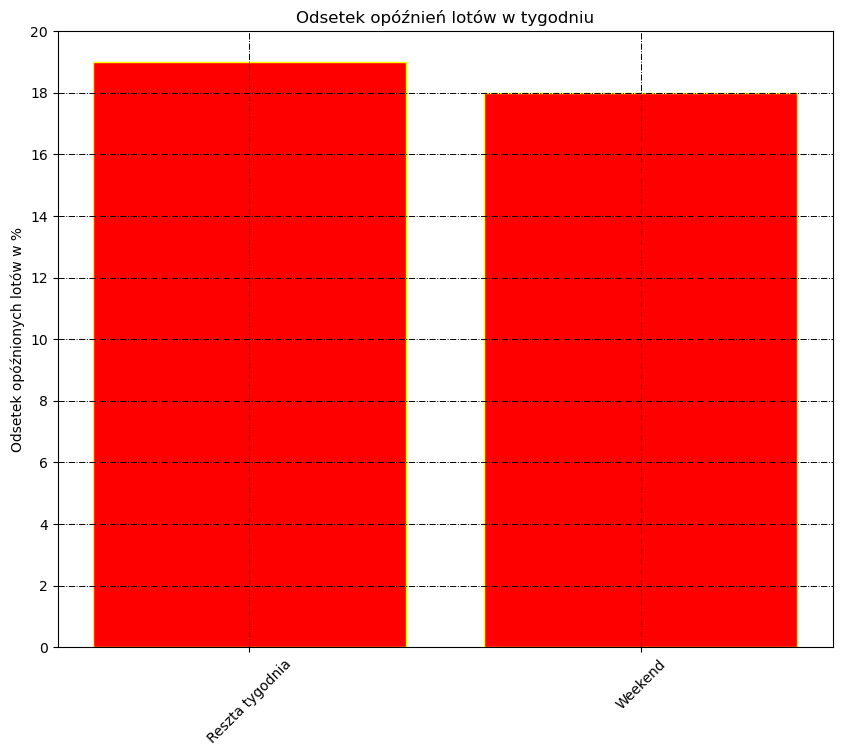

In [30]:
plt.figure(figsize=(10,8))

# Wybranie danych

weekend = list(flight_delays_by_weekend.keys())
values = [value * 100 for value in flight_delays_by_weekend.values()]


x = plt.bar(weekend, values, 
             color="Red", edgecolor="yellow", log=False, label="Odsetek opóźnień")


plt.title('Odsetek opóźnień lotów w tygodniu')

plt.ylabel('Odsetek opóźnionych lotów w %')
plt.yticks(ticks=range(0, 21, 2))
plt.grid(which='major', linestyle='-.', linewidth='0.7', color='black')

# Zapisanie nazw na osi x

days = list(range(0, 2))
days_names = ["Reszta tygodnia", "Weekend"]
plt.xticks(days, days_names, rotation=45)


    
plt.show()

Wnioski na podstawie wykresu:    
    Moim zdaniem różnica pomiędzy opóźnieniami w tygodniu i w weekendy jest na tyle mała (1 pkt procentowy wobec 18-19% pomiaru), że może być tutaj pomijana. 
    
Bez dokładniejszych badań lotów uzwględniających takie pytania, jak:

    - jak do kolumny "day_of_week" liczą się loty nocne?
    - analizy długości opóźnień w poszczególne dni tygodnia,
    
Nie można jednoznacznie stwierdzić, czy loty w weekend mają bardziej/mniej znaczące opóźnienia, niż w reszcie tygodnia.

 # Opóźnienia vs. odległość lotu
 Analiza kolumny `distance`:  
 1. Wyznaczenie percentyli.  
 2. Spozrądzenie wykresu punktowego.  
 3. Odsianie z ramki `flight_df`, te wiersze, dla których `distance` jest powyżej 95% percentyla.  
 4. Agregacja zmiennej `distance` co 100 mil do nowej kolumny `distance_agg`. 
 5. Sporządzenie wykresu słupkowego.
 6. Czy większy dystans oznacza większe prawdopodobieństwo opóźnienia lotu?


In [31]:
# Wyznaczenie percentyli:

per = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
flight_distance_analysis_df = flight_df['distance'].describe(percentiles=per).round(2)

 Wykres dla 10 000 losowych wierszy z tabeli `flight_df`

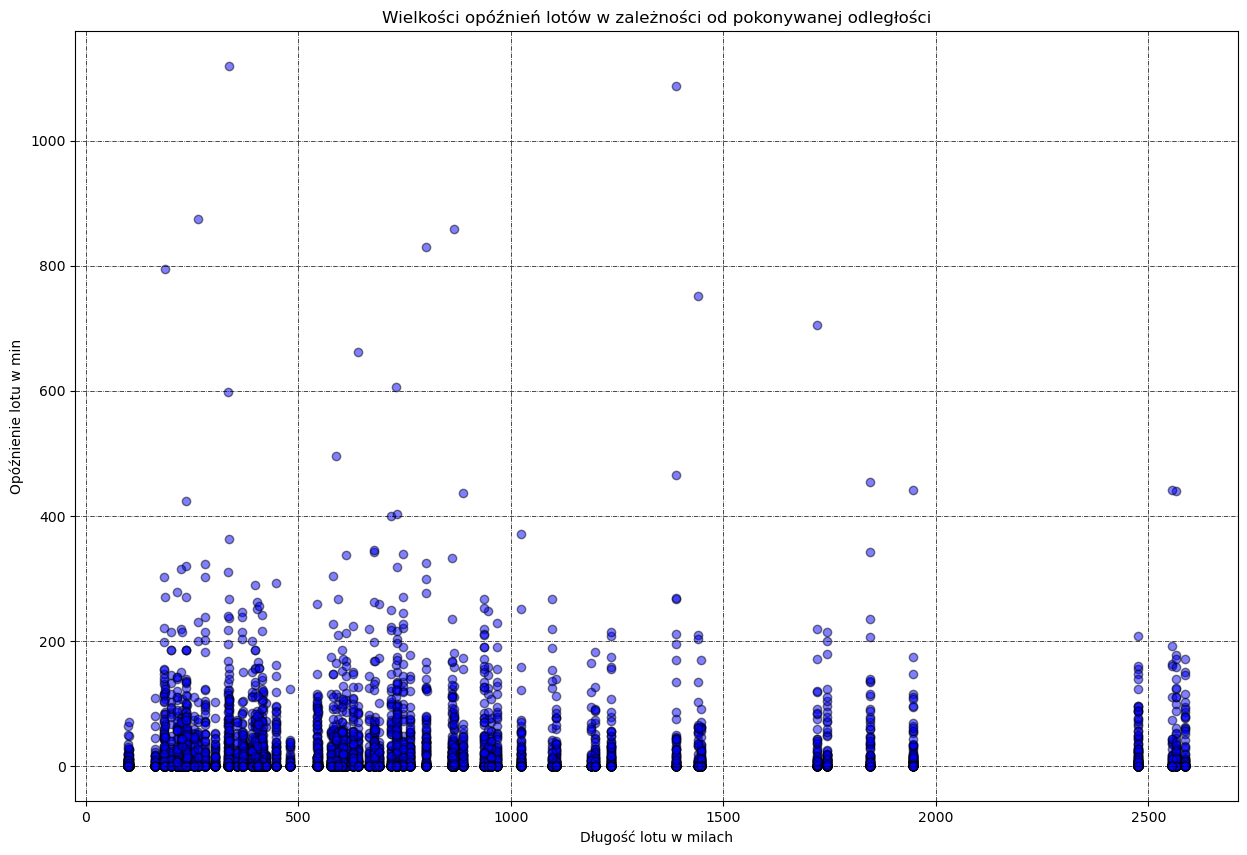

In [32]:
plt.figure(figsize=(15,10))

# Wybranie danych:


df = flight_df[['distance', 'dep_delay']]
df = df.sample(n=10000)


plt.scatter(df['distance'], df['dep_delay'], 
             color="Blue", alpha=0.5, edgecolor="Black", label="Odsetek opóźnień")


plt.ylabel('Opóźnienie lotu w min')

plt.xlabel('Długość lotu w milach')

plt.title('Wielkości opóźnień lotów w zależności od pokonywanej odległości')
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='black')

    
plt.show()

Wnioski:

    Moim zdaniem nie widać zależności, by odległość pokonywana w trakcie lotu przekładała się na długość jego opóźnienia: długie opóźnienia (powyżej np. 200 min) pojawiają się na przestrzeni całego wykresu. I to wcale nie częściej dla długich lotów.
    Na podstawie powyższego wykresu nie można niczego stwierdzić na temat prawdopodobieństwa opóźnienia lotu w zależności od jego długości: nie widać bowiem jak wiele pukntów znajduje się na 0, a ile powyżej 0 na osi Y, a więc jest lotami opóźnionymi. Zaproponowany typ wykresu oraz wybrane dane nie nadają się do przedstawienia takich wyników. 

In [33]:
# Odczytana wartość 95 percentyla:

per_95 = 2475
 
    
# Usunięcie danych spoza zakresu 95 percentyla:

flight_df = flight_df.loc[flight_df['distance'] <= per_95]

In [35]:
# Tworzenie kategorii co 100 mil przy użyciu funkcji cut. Max distance wynosi 2475, więc ostatnia kategoria to 2575

bins = range(0, 2575, 100)


# Dodanie kolumny distance_agg

flight_df['distance_agg'] = pd.cut(flight_df['distance'], bins)

In [36]:
# Grupowanie otrzymanych danych:

flight_delays_by_distance_agg_df = flight_df.groupby('distance_agg')['distance'].mean().reset_index().round(0)


# Wyznaczenie odsetku opóźnień dla lotów w poszczególnych przedziałach:

przedzialy = flight_delays_by_distance_agg_df['distance_agg'].tolist()
delayed_column = []

for p in przedzialy:
    temp_df = flight_df.loc[flight_df['distance_agg'] == p]
    # Aby uniknąć dzielenia przez 0 - dla przedziałów, które nie zawierają lotów:
    
    if len(temp_df) > 0:
        temp_result = (temp_df['is_delayed'].count() / len(temp_df)).round(2)
    else:
        temp_result = 0
        
    # Dopisanie uzyskanego wyniku do listy delayed_column
    
    delayed_column.append(temp_result)
    
    
# Utworzenie ramki z obu list:

data = {'distance_agg': przedzialy, 'delays': delayed_column}    
flight_delays_by_distance_agg_df = pd.DataFrame(data)   


 Wykres słupkowy używający danych zapisanych w `flight_delays_by_distance_agg_df`

In [37]:
# Zamiana typu kolumny distance_agg na str

flight_delays_by_distance_agg_df['distance_agg'] = flight_delays_by_distance_agg_df['distance_agg'].astype(str)

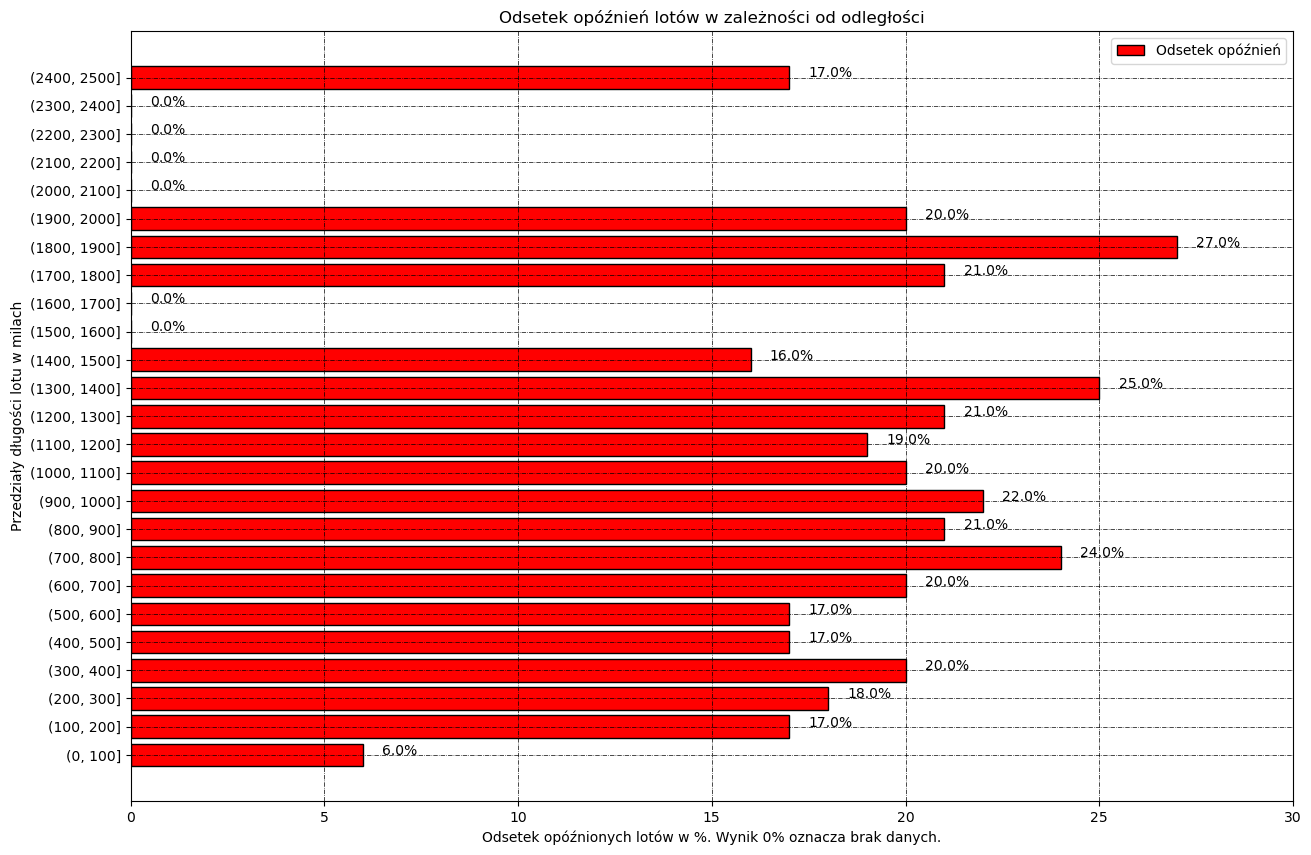

In [283]:
plt.figure(figsize=(15,10))

# Wybranie danych

df = flight_delays_by_distance_agg_df


x = plt.barh(df['distance_agg'], 
            df['delays']*100,
             color="Red", edgecolor="Black", log=False, label="Odsetek opóźnień")


plt.xlabel('Odsetek opóźnionych lotów w %. Wynik 0% oznacza brak danych.')
plt.xticks(ticks=range(0, 31, 5))

plt.ylabel('Przedziały długości lotu w milach')

plt.title('Odsetek opóźnień lotów w zależności od odległości')
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='black')


plt.legend()

# Iteracja przez dane i dodanie etykiet

# Wartości etykiet

names = (df['delays']*100).tolist()

for i in range(0,25):
    temp_df = df.loc[df.index == i]
    name = names[i]
    plt.text( name+0.5,i-0.1, str(name)+'%', rotation=0, va='bottom', ha='left')
    
plt.show()

 # Opóźnienia vs. grupa odległości
 Analiza kolumny `distance_group`:  
 1. Dla jakich odcinków zostały wyznaczone poszczególne grupy? Wyznacz maksymalną oraz minimalną `distance` wartość w poszczególnych grupach.  
 2. Wyznacz prawdopodobieństwo opóźnienia przy użyciu tych grup. 
 3. Wykreśl odpowiedni wykres wizualizujący dane.  
 4. Na ile wyniki tej analizy są zbieżne z tą wykonaną w poprzednim punkcie?

Ustalenie odcinków, dla których zostały wyznaczone poszczególne grupy:

In [39]:
distance_group = flight_df['distance_group'].unique().tolist()
list_min = []
list_max = []

for d in distance_group:
    temp_df = flight_df.loc[flight_df['distance_group'] == d]
    list_min.append(temp_df['distance'].min())
    list_max.append(temp_df['distance'].max())

    
# Zamiana uzyskanych list na Data Frame:

data = {'distance_group': distance_group, 'distance_min': list_min, 'distance_max': list_max}    
flight_distance_by_distance_group = pd.DataFrame(data).sort_values(by=['distance_group'])


In [40]:
# Wyznaczenie odsetku opóźnień dla lotów w poszczególnych kategoriach:

distance_group = flight_df['distance_group'].unique().tolist()
delayed_column = []
for d in distance_group:
    temp_df = flight_df.loc[flight_df['distance_group'] == d]
    
    # Aby uniknąć dzielenia przez 0:
    
    if len(temp_df) > 0:
        temp_result = (temp_df['is_delayed'].count() / len(temp_df)).round(2)
    else:
        temp_result = 0
        
    # Dopisanie uzyskanego wyniku do listy delayed_column
    
    delayed_column.append(temp_result)
    
    
# Utworzenie ramki z obu list:

data = {'distance_group': distance_group, 'delays': delayed_column}    
flight_delays_by_distance_group_df = pd.DataFrame(data).sort_values(by=['distance_group'])  


 Sporządzenie wykresu:

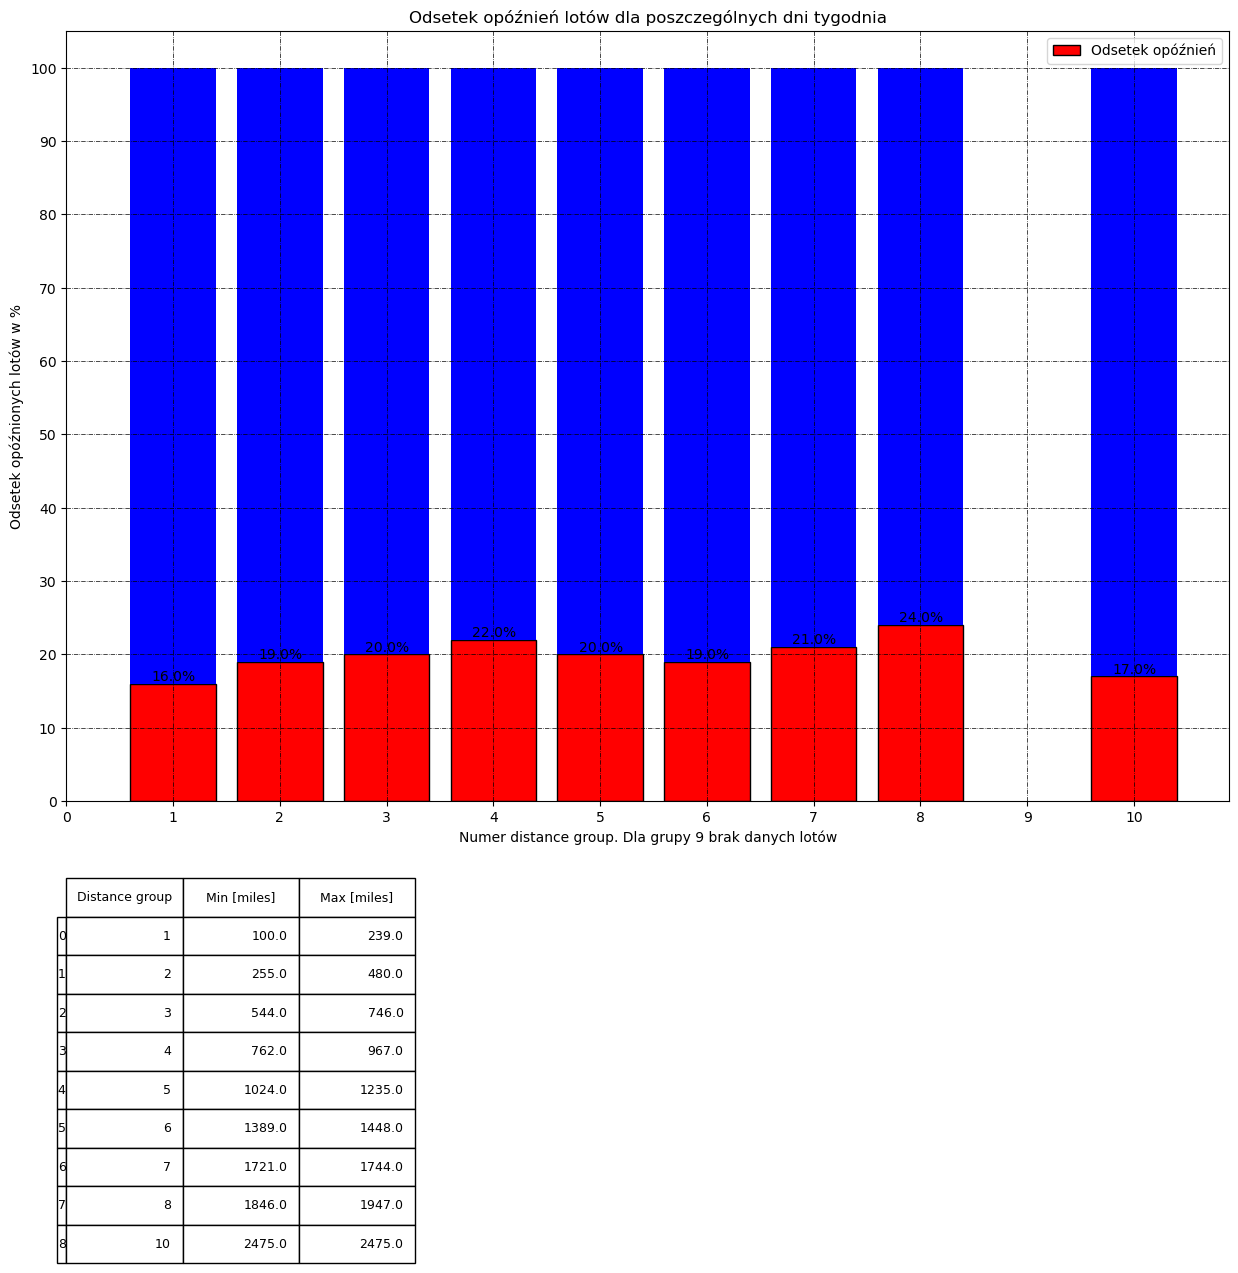

In [41]:
plt.figure(figsize=(15,10))

# Wybranie danych:

df = flight_delays_by_distance_group_df


x = plt.bar(df['distance_group'], df['delays'] * 100, 
             color="Red", edgecolor="Black", log=False, label="Odsetek opóźnień")


# Bar dopełniający do 100%

plt.bar(df['distance_group'], 100 - (df['delays'] * 100), color='Blue',
        bottom=(df['delays'] * 100))


plt.ylabel('Odsetek opóźnionych lotów w %')
plt.yticks(ticks=range(0, 101, 10))
plt.xlabel('Numer distance group. Dla grupy 9 brak danych lotów')
plt.xticks(ticks=range(0, 11, 1))

plt.title('Odsetek opóźnień lotów dla poszczególnych dni tygodnia')
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='black')


plt.legend()

# Iteracja przez dane i dodanie etykiet

# Wartości etykiet:

names = (df['delays']*100).tolist()
distance_groups = (df['distance_group']).tolist()

for i in range(0,9):
    plt.text(distance_groups[i] - 0.2, names[i], str(names[i])+'%', rotation=0, va='bottom', ha='left')

# Dodanie tabeli z wartościami pod wykresem:

cells = []
cellLabels = []

# Posortowanie wg. kolumny distance_group

flight_distance_by_distance_group = flight_distance_by_distance_group.sort_values(by=['distance_group'])

# Poszczególne elementy tabeli:

c1 = flight_distance_by_distance_group['distance_group'].tolist()
c2 = flight_distance_by_distance_group['distance_min'].tolist()
c3 = flight_distance_by_distance_group['distance_max'].tolist()

for i in range(0,9):
    cells.append([c1[i], c2[i], c3[i]])
    cellLabels.append(i)
    
plt.table(cellText=cells,
          rowLabels=cellLabels,
          colLabels =['Distance group','Min [miles]', 'Max [miles]'],
          bbox=[0.0, -0.6, 0.3, 0.5])
    
plt.show()

 ## Czy większy dystans oznacza większe prawdopodobieństwo opóźnenia lotu?

Oba wykresy dają podobne wnioski, a mianowicie:
- Największa szansa uniknięcia opóźnienia dotyczy najkrótszych lotów (widać to w 1 grupie wykresu 2 oraz, przede wszystkim, na dystansie do 100 mil wykresu 1. Tu wskaźnik opóźnień jako nedyny jest mniejszy od 10%)
- Szczególnie duża szansa na opóźnienie dotyczy lotów z przedziału odległości 1800-1900 mil.
- Poza tym wskaźnik opóźnień waha się pomiędzy 17%-22%, wykraczając poza te wrtości przy dokładniejszym przyjrzeniu się (użyciu większej liczby przedziałów na wykresie 1). Co dobitnie pokazuje, że wykres 1 (ze względu na rozbicie lotów na większą liczbę przedziałów) jest dokładniejszy, a więc bardziej wartościowy, bo nie spłaszcza wyników tak bardzo jak wykres 2.

In [42]:
# Zapis ramki danych do dalszej analizy:

flight_df.to_csv(r'C:\Coderslab_Analityk_kurs\Projekt_koncowy\data\processed\flight_df_01.csv', index=False)